In [1]:
%matplotlib inline
import pylab
import numpy as np
import nengo
import nengo_dl
import tensorflow as tf


/home/ubuntu/.local/lib/python2.7/site-packages/nengo_dl/__init__.py:18: UserWarning: No GPU support detected. It is recommended that you install tensorflow-gpu (`pip install tensorflow-gpu`).
  warnings.warn("No GPU support detected. It is recommended that you "


Make the data to train on

In [2]:
D = 2

n_batches = 1
inputs = np.random.normal(size=(n_batches, 50, D))

targets = np.product(inputs, axis=2)
targets.shape = targets.shape[0], targets.shape[1], 1

Make a simple network to train

In [3]:
model = nengo.Network(seed=2)
with model:
    input = nengo.Node(nengo.processes.WhiteSignal(period=20, high=5, rms=0.5), size_out=D)
    l1 = nengo.Ensemble(n_neurons=100*D, dimensions=D, neuron_type=nengo.RectifiedLinear())
    output = nengo.Ensemble(n_neurons=100, dimensions=1, neuron_type=nengo.RectifiedLinear())
    
    nengo.Connection(input, l1)
    nengo.Connection(l1, output, function=lambda x: np.product(x))
    
    p_out = nengo.Probe(output)
    p_in = nengo.Probe(input)
    

Make the simulator

In [4]:
sim = nengo_dl.Simulator(model)


Building completed in 0:00:00 
Construction completed in 0:00:05 


Run it before training

Simulation completed in 0:00:01


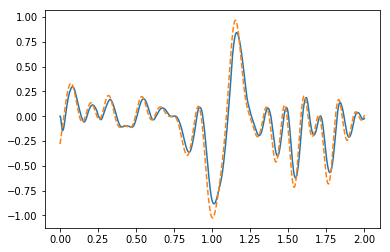

In [5]:
sim.run(2)
pylab.plot(sim.trange(), sim.data[p_out])
pylab.plot(sim.trange(), np.product(sim.data[p_in], axis=1), ls='--')
pylab.show()

In [6]:
sim.loss(inputs={input: inputs}, targets={p_out: targets}, objective='mse')

1.0196535587310791

Now train the network

In [7]:

sim.train(inputs={input: inputs}, targets={p_out: targets}, 
          optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1),
          n_epochs=2)

[##############################] ETA: 0:00:00 (Training)
Training completed in 0:00:04


And plot the results

Simulation completed in 0:00:00


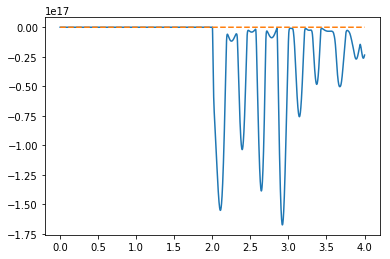

In [8]:
sim.run(2)
pylab.plot(sim.trange(), sim.data[p_out])
pylab.plot(sim.trange(), np.product(sim.data[p_in], axis=1), ls='--')
pylab.show()

Why is it horribly wrong now?  The scale seems way off....

In [9]:
sim.loss(inputs={input: inputs}, targets={p_out: targets}, objective='mse')

7.132478965857993e+32

That's a pretty high loss....